In [4]:
import sqlite3
import pandas as pd
import numpy as np
import time
from utils import *
from ReactNode import ReactNode
from ChemNode import ChemNode
from ChemNode import ChemNode
from MCTS import MCTS
from tree_utils import *

conn = sqlite3.connect('buyable.db')
buyable = conn.cursor()
retrobiocat = pd.read_pickle("data/final_test_retrobiocat.pkl")
analyzer = Retrosim()

smile = "C[C@@H](N)[C@H](O)c1ccccc1"
root = ChemNode(smile, 0, None, buyable, retrobiocat, analyzer, None)

mcts = MCTS(root)

start = time.time()
mcts.MCTS(1000)
print("Time taken (s): ", time.time()-start)

100%|██████████| 1000/1000 [01:04<00:00, 15.43it/s]

Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing selected
Nothing select

In [5]:
for react in root.reactions:
    print(f'Reaction name: {react.reaction_name}, Score: {react.get_mcts_value()}')
    for precursor in react.precursors:
        print(f'Chem {precursor.smiles}, Score: {precursor.score}, visits: {precursor.visits}, solution: {precursor.solution}')
    print(" ")

Reaction name: Amide hydrolysis (NH), Score: 1.0739181610309607
Chem CC(=O)N[C@H](C)[C@H](O)c1ccccc1, Score: 1.71, visits: 10, solution: False
 
Reaction name: Ester hydrolysis (OH), Score: 1.0791936179518034
Chem CCC(=O)O[C@H](c1ccccc1)[C@@H](C)N, Score: 0.0, visits: 7, solution: False
 
Reaction name: Imine reduction, Score: 1.1656623335537126
Chem CC(=N)[C@H](O)c1ccccc1, Score: 0.0, visits: 6, solution: False
 
Reaction name: Ketone amination, Score: 1.17381941118125
Chem CC(=O)[C@H](O)c1ccccc1, Score: 5.75, visits: 14, solution: True
 
Reaction name: Phosphate hydrolysis, Score: 1.116368193092165
Chem C[C@@H](N)[C@H](OP(=O)(O)O)c1ccccc1, Score: 0.855, visits: 8, solution: False
 
Reaction name: Ketone reduction, Score: 1.1282431930921648
Chem C[C@@H](N)C(=O)c1ccccc1, Score: 0.95, visits: 8, solution: True
 
Reaction name: Imine reduction, Score: 1.1656623335537126
Chem CC(=N)[C@H](O)c1ccccc1, Score: 0.0, visits: 6, solution: False
 


In [9]:
root.solution

True

In [6]:
# Prune the tree starting from the root
prune_tree(root)
paths = generate_paths(root)
print(len(paths))

4


In [7]:
path_explorer(paths[1])

BRANCH 0:
-----------------
Chem: C[C@@H](N)[C@H](O)c1ccccc1
Reaction: Ketone amination
Chem: CC(=O)[C@H](O)c1ccccc1
Reaction: Thiamine-dependent Lyase (Ar Acceptor) CO2
SPLIT: Chem1: CC(=O)C(=O)O, Chem2: O=Cc1ccccc1

BUYABLE

BRANCH 1:
-----------------
Chem: O=Cc1ccccc1
BUYABLE



BRANCH 0:
-----------------
Chem: C[C@@H](N)[C@H](O)c1ccccc1


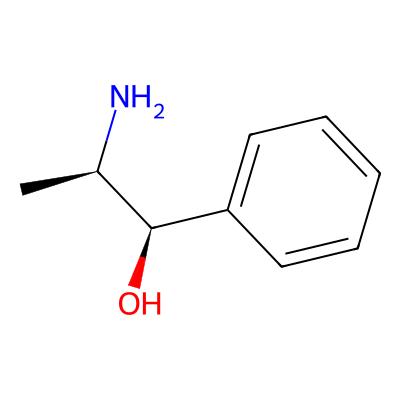

Reaction: Ketone amination
Chem: CC(=O)[C@H](O)c1ccccc1


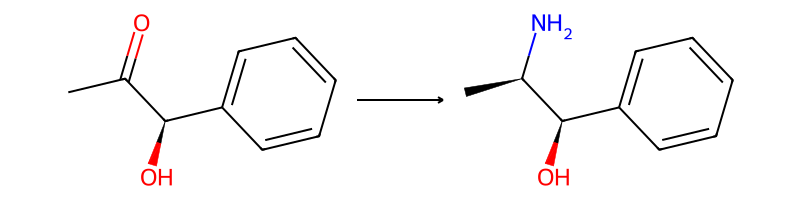

Reaction: Thiamine-dependent Lyase (Ar Acceptor) CO2
SPLIT: Chem1: CC(=O)C(=O)O, Chem2: O=Cc1ccccc1



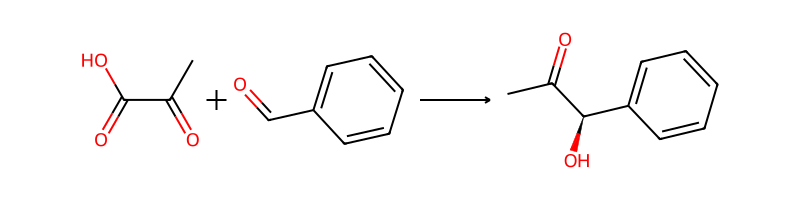

BUYABLE

BRANCH 1:
-----------------
Chem: O=Cc1ccccc1


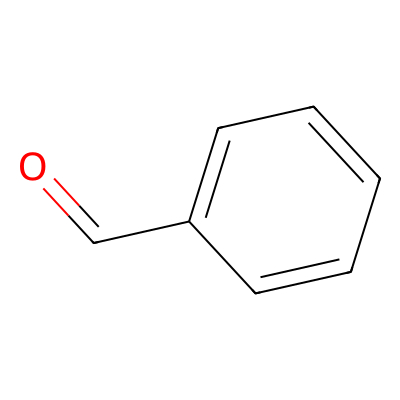

BUYABLE



In [9]:
path_explorer2(paths[1])

In [12]:
prune_tree(root)
paths = generate_paths(root)
graph = build_graph(paths[2])  
plot_graph(graph)

IndexError: list index out of range

In [13]:
ChemNode.plot_retro_tree(root, max_depth=5)

NameError: name 'build_retro_tree' is not defined